In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glhmm.glhmm as glhmm
import seaborn as sns
import network_tools as nt
import importlib
import networkx as nx
import dynamics as dyn
from scipy.linalg import eig

In [118]:
importlib.reload(nt)
importlib.reload(dyn)

<module 'dynamics' from '/Users/ramon/Desktop/Year 2/hmm/dynamics.py'>

In [6]:
N = 10
W = nt.generate_hierarchical_network(N,mu = 0.2,p0 = 1,recip = 10)

In [23]:
Theta = 10
gamma = 1
sigma = 0.1
dt = 0.05
steps = 1000
print(np.real(np.linalg.eig(Theta*(np.diag(np.ones(N))-gamma*W)).eigenvalues)>0)
Phi = dyn.EPR_network_ornstein_uhlenbeck(W,sigma,Theta,gamma)

[ True  True  True  True  True  True  True  True  True  True]


In [24]:
list = []
for eps in np.linspace(0,1,101):
    W_hat = nt.parameterise_network(W,eps)
    Phi = dyn.EPR_network_ornstein_uhlenbeck(W_hat,sigma,Theta,gamma)
    list.append(Phi)

In [104]:
[X,t] = dyn.network_ornstein_uhlenbeck(nt.parameterise_network(W,1),sigma,Theta,gamma,dt,steps)

In [105]:
tau = 4
X_sampled = X[:,0::tau]
t_sampled= t[0::tau]

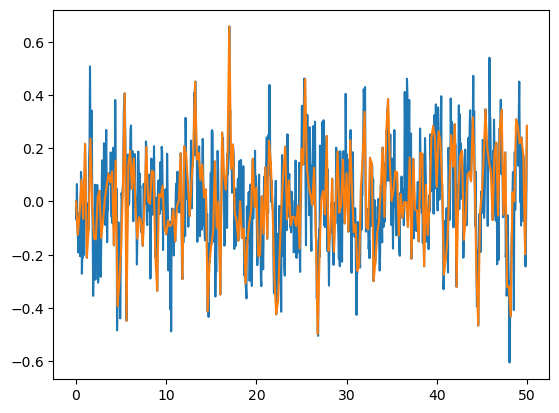

In [106]:
plt.plot(t,X[0,:])
plt.plot(t_sampled,X_sampled[0,])


In [130]:
EPR_true = []
EPR_hmm =[]
for eps in np.linspace(0,1,101):
    W_hat = nt.parameterise_network(W,eps)
    Phi = dyn.EPR_network_ornstein_uhlenbeck(W_hat,sigma,Theta,gamma)
    EPR_true.append(Phi)
    [X,t] = dyn.network_ornstein_uhlenbeck(nt.parameterise_network(W,eps),sigma,Theta,gamma,dt,steps=5000)
    K=10
    hmm = glhmm.glhmm(model_beta='no', K=10, covtype='full')
    hmm.train(X=None, Y=np.transpose(X))
    TP = np.zeros(shape=(K, K))
    TP = hmm.P
    ss = dyn.steady_state(TP)
    EPR_hmm.append(dyn.EPR_markov_chain(ss,TP))
    

Init repetition 1 free energy = 3267.127673405711
Init repetition 2 free energy = 3376.346926912389
Init repetition 3 free energy = 3262.045068911132
Init repetition 4 free energy = 3281.442561553766
Init repetition 5 free energy = 3393.827998947272
Best repetition: 3
State 1 is deactivated
Cycle 1 free energy = 3391.2741257205316
Cycle 2 free energy = 3165.196088909477
Cycle 3, free energy = 3158.2155113288554, relative change = 0.02995202558310155
Cycle 4, free energy = 3141.8431060895764, relative change = 0.06563901019008288
Cycle 5, free energy = 3121.494122266136, relative change = 0.07542806569383224
Cycle 6, free energy = 3107.274609782262, relative change = 0.05006879126852034
Cycle 7, free energy = 3099.6032320696504, relative change = 0.02630148526850898
Cycle 8, free energy = 3095.156457754674, relative change = 0.015016916570776608
Cycle 9, free energy = 3092.362365166621, relative change = 0.009347549868480534
Cycle 10, free energy = 3090.408387659632, relative change = 0

KeyboardInterrupt: 

In [123]:
EPR_true

[4.80441498302797e-14,
 0.0015723405866001558,
 0.006289342214777116,
 0.01415094451519236,
 0.025157046956822818,
 0.03930750897474647,
 0.05660215014659198,
 0.07704075042019723,
 0.10062305038810013,
 0.12734875161238868,
 0.1572175169937183,
 0.1902289711878145,
 0.2263827010643976,
 0.26567825621032204,
 0.3081151494716847,
 0.3536928575365975,
 0.4024108215542543,
 0.4542684477894338,
 0.5092651083097063,
 0.5674001417046155,
 0.6286728538325164,
 0.6930825185937091,
 0.7606283787298209,
 0.8313096466423774,
 0.905125505233157,
 0.9820751087598449,
 1.0621575837088322,
 1.145372029678305,
 1.2317175202736361,
 1.3211931040096996,
 1.4137978052196845,
 1.5095306249672584,
 1.60839054196121,
 1.7103765134692603,
 1.8154874762299094,
 1.9237223473603162,
 2.0350800252588885,
 2.149559390499536,
 2.2671593067182014,
 2.3878786214883077,
 2.5117161671846677,
 2.6386707618341756,
 2.7687412099536415,
 2.9019263033703524,
 3.0382248220285546,
 3.177635534777849,
 3.3201572001441884,
 3.

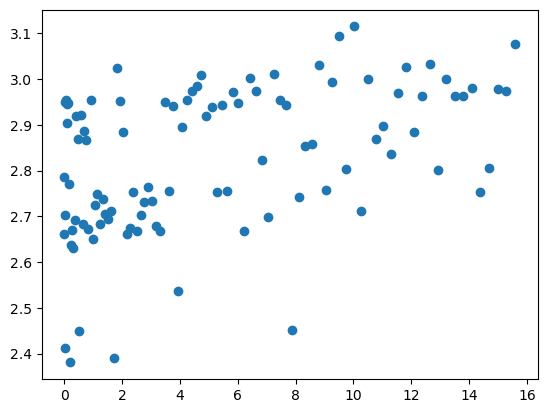

In [129]:
plt.scatter(EPR_true,EPR_hmm)